In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.linear_model import Lasso

In [75]:
car_df=pd.read_csv("car data.csv")

In [76]:
car_df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [77]:
car_df.shape

(301, 9)

In [78]:
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [79]:
car_df["Fuel_Type"].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [80]:
car_df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [81]:
car_df["Seller_Type"].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [82]:
car_df["Transmission"].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [83]:
car_df.replace({'Fuel_Type':{'Petrol':0,'Diesel':1,'CNG':2}},inplace=True)
car_df.replace({'Seller_Type':{'Dealer':0,'Individual':1}},inplace=True)
car_df.replace({'Transmission':{'Manual':0,'Automatic':1}},inplace=True)

In [84]:
car_df

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,1,0,0,0
297,brio,2015,4.00,5.90,60000,0,0,0,0
298,city,2009,3.35,11.00,87934,0,0,0,0
299,city,2017,11.50,12.50,9000,1,0,0,0


In [85]:
x=car_df.drop(['Selling_Price','Car_Name'],axis=1)
y=car_df['Selling_Price']

In [86]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.1,random_state=2)

In [88]:
lin_reg=LinearRegression()

In [89]:
lin_reg.fit(x_train,y_train)

LinearRegression()

In [90]:
data_pre=lin_reg.predict(x_train)

In [91]:
error_score=metrics.r2_score(y_train,data_pre)
error_score

0.8799451660493698

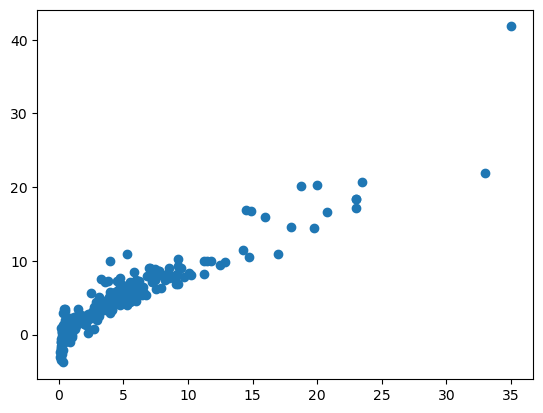

In [92]:
plt.scatter(y_train,data_pre)

In [93]:
test_pred=lin_reg.predict(x_test)

In [94]:
error_test=metrics.r2_score(y_test,test_pred)
error_test

0.8365766715026903

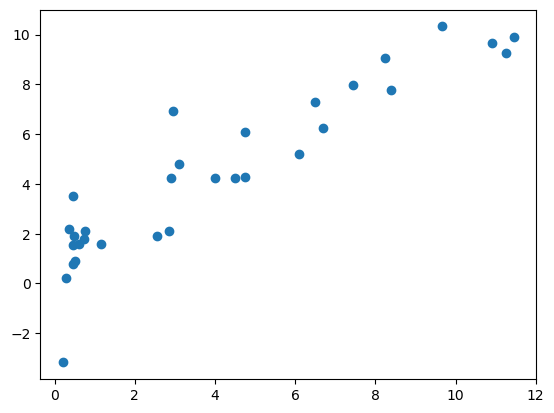

In [95]:
plt.scatter(y_test,test_pred)

In [96]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [97]:
lasso=Lasso()

In [98]:
lasso.fit(x_train,y_train)

Lasso()

In [99]:
lasso_pred=lasso.predict(x_train)

In [100]:
error_lasso=metrics.r2_score(y_train,lasso_pred)
erroo_lasso

0.8427856123435794

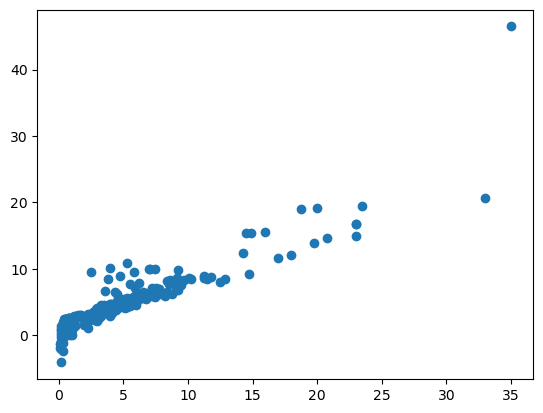

In [101]:
plt.scatter(y_train,lasso_pred)

In [102]:
lasso_pred_test=lasso.predict(x_test)

In [103]:
error_lasso_test=metrics.r2_score(y_test,lasso_pred_test)
error_lasso_test

0.8709167941173195

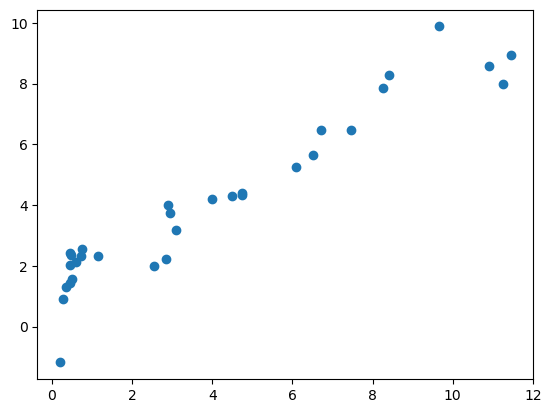

In [104]:
plt.scatter(y_test,lasso_pred_test)